# Python 資料分析實務

> 郭耀仁 <yaojenkuo@datainpoint.com>

## 大綱

- 何謂一個資料分析專案
- 為什麼使用 Python
- Python 資料分析套件
- Python 資料分析實務

## 何謂一個資料分析專案

## 掌握資料流的管線

![Imgur](https://i.imgur.com/din6Ig6.png)

圖片來源: <https://r4ds.had.co.nz/>

## Import：從常見來源將資料載入分析環境

- 檔案
- 資料庫
- 網頁

## Tidy and Transform：以適當的資料結構整併內容與轉換樣式

- 文字
- 陣列
- 資料框
- 清單
- 字典

## Visualize：探索分析資料的形狀、相關、組成與趨勢

- 形狀：直方圖
- 相關：散佈圖
- 組成：長條圖
- 趨勢：線圖

## Model：預測或挖掘資料的隱含特徵

- 預測：監督式
- 挖掘：非監督式

## Communicate：向產品、行銷與管理團隊精準且有效地傳達分析洞察

- 簡報
- 文件
- 儀表板

## Program：利用程式語言掌握資料流的管線

- 規模化
- 自動化

## 為什麼使用 Python

## 如何選擇程式語言？

- 應用領域
- 現況
- 趨勢

## 應用領域：資料分析

[2019 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019) 的兩個問題：

- Q18: What programming languages do you use on a regular basis?
- Q19: What programming language would you recommend an aspiring data scientist to learn first?

## 什麼是 Kaggle？ 

> Kaggle 是全世界最大的資料科學社群、資料探勘、分析競賽平台。企業和研究者可在該網站發表競賽，隨時都有各種不同目標的比賽進行著，部分比賽提供高額的獎金，因此會吸引全世界優秀的資料科學家前來比賽，並有許多參賽者在賽後於討論區留下邏輯以及思路脈絡。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def get_value_ratios(df, col_name):
    return df[col_name].value_counts() / df[col_name].value_counts().sum()
    
def get_checkbox_ratios(df, col_pattern):
    channel_names = []
    channel_checks = []
    for col_name in df.columns:
        if (col_pattern in col_name) and ('OTHER_TEXT' not in col_name):
            channel_name = df[col_name].value_counts().index
            channel_check = df[col_name].value_counts().values
            if channel_name.size != 0:
                channel_names.append(channel_name[0])
                channel_checks.append(channel_check[0])
    channel_counts = pd.Series(channel_checks, index=channel_names)
    channel_ratios = channel_counts / channel_counts.sum()
    channel_ratios_sorted = channel_ratios.sort_values(ascending=False)
    return channel_ratios_sorted

survey_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/multiple_choice_responses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)
da_2019 = survey_2019[survey_2019['Q5'] == 'Data Analyst']

In [2]:
def plot_ans_14(ans_14_ser):
    fig = plt.figure()
    ax = plt.axes()
    ans_14_ser = ans_14_ser[::-1]
    ax.barh(ans_14_ser.index, ans_14_ser.values, color=['c', 'c', 'c', 'c', 'c', 'r'])
    ax.set_title("What is the primary tool that you use at work or school to analyze data?")
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

def get_ax(ans_ser, plot_title, ax):
    ax = ax
    ans_ser = ans_ser[:10][::-1]
    ax.barh(ans_ser.index, ans_ser.values, color=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'r', 'r', 'r'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(plot_title)
    
def plot_ans_18_19(ans_18_ser, ans_19_ser):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    get_ax(ans_18_ser, "What programming languages do you use on a regular basis?", ax1)
    get_ax(ans_19_ser, "What programming language would you recommend \n an aspiring data scientist to learn first?", ax2)
    plt.tight_layout()
    plt.show()

ans_14 = get_value_ratios(da_2019, 'Q14')
ans_18 = get_checkbox_ratios(da_2019, 'Q18')
ans_19 = get_value_ratios(da_2019, 'Q19')

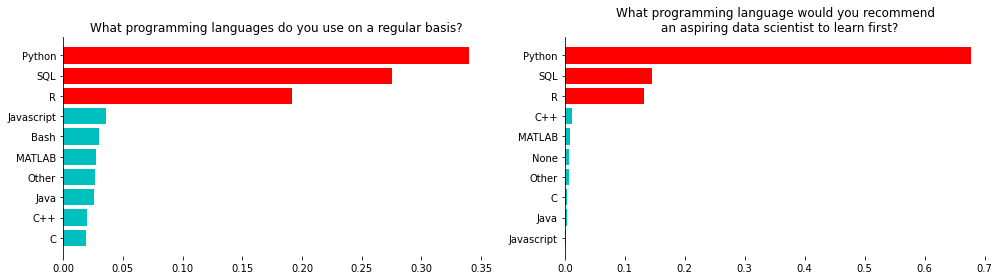

In [3]:
# What programming languages do you use on a regular basis?
# What programming language would you recommend an aspiring data scientist to learn first?
plot_ans_18_19(ans_18, ans_19)

## 現況

- [2020 IEEE](https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2020)
- [TIOBE Index](https://www.tiobe.com/tiobe-index/)

## 趨勢

[Stack Overflow Trends](https://insights.stackoverflow.com/trends?tags=java%2Cc%2Cc%2B%2B%2Cpython%2Cc%23%2Cvb.net%2Cjavascript%2Cassembly%2Cphp%2Cperl%2Cruby%2Cvb%2Cswift%2Cr%2Cobjective-c)

## Python 的套件生態系是受資料科學家熱愛的主因

- [標準套件](https://docs.python.org/3/library/)
- 第三方套件

## 每個資料流管線環節都有對應的標準、第三方套件支援

![Imgur](https://i.imgur.com/din6Ig6.png)

圖片來源: <https://r4ds.had.co.nz/>

## Import：從常見來源將資料載入分析環境

- `csv`
- `json`
- `numpy`
- `pandas`
- `requests`
- `beautifulsoup4`
- `xml`
- `sqlite3`

## Tidy and Transform：以適當的資料結構整併內容與轉換樣式

- `collections`
- `itertools`
- `numpy`
- `pandas`
- 內建函式型程式設計功能
    - `map()`
    - `filter()`
    - `lambda`

## Visualize：探索分析資料的形狀、相關、組成與趨勢

- `pandas`
- `matplotlib`
- `seaborn`

## Model：預測或挖掘資料的隱含特徵

- `scikit-learn`
- `scipy`
- `tensorflow`
- `pytorch`

## Communicate：向產品、行銷與管理團隊精準且有效地傳達分析洞察

- `jupyter`
- `dash`

## 如何區分標準、第三方套件？

- 由 [Python.org](https://www.python.org/) 所維護的套件，可以在 <https://docs.python.org/3/library/index.html> 找到說明文件
- 由第三方開發團隊所維護的套件，能夠在 [PyPI](https://pypi.org/) 找到

## 如何在沒有安裝設定下撰寫、執行 Python？

- 網路
- 瀏覽器

## 我們可以使用這兩種工具

- [設定好的 Binder 元件](https://mybinder.org/v2/gh/yaojenkuo/python-data-analysis/master)
- [可以互動的 Google Colab](https://colab.research.google.com)

## 不論是 Binder 或者 Google Colab 都是以 [Jupyter Notebook](https://jupyter.org/) 作為主要的使用介面

## Python 資料分析套件

## 工作坊主要使用的第三方套件

- 使用 [NumPy](https://numpy.org/) 計算數列
- 使用 [Pandas](https://pandas.pydata.org/) 分析表格
- 使用 [Matplotlib](https://matplotlib.org/) 作圖

## 工作坊次要使用的第三方套件

- 使用 [Requests](https://requests.readthedocs.io/en/master/) 請求網頁資料
- 使用 [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) 解析網頁資料

## 確認能夠使用這些第三方套件

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import requests
import bs4

## 檢視這些第三方套件的版本資訊

In [5]:
print(np.__version__)
print(pd.__version__)
print(mpl.__version__)
print(requests.__version__)
print(bs4.__version__)

1.18.4
1.0.3
3.2.1
2.23.0
4.9.1


## 簡介 NumPy 套件

> NumPy，Numerical Python 的簡稱，是使用 Python 進行科學計算的第三方套件，創造了一個稱為 N 維陣列（ndarray）的類別，透過 N 維陣列，可以將 Python 從一個泛用（general purposed）程式語言轉變成一個科學計算（scientific computing）程式語言，並且有豐富的統計、線性代數與隨機的函式。

## 簡介 Pandas 套件

> Pandas，Panel DataFrame Series 的簡稱，是在 Python 中分析表格資料的第三方套件，創造了稱為索引（Index）、序列（Series）與資料框（DataFrame）的類別，透過這些類別，可以讓 Python 在面對文字檔案、Excel 試算表與關聯式資料庫時能夠使用更直覺的觀念操作。

## 簡介 Matplotlib 套件

> Matplotlib，Matlab Plotting Library 的簡稱，是在 Python 中將資料視覺化的第三方套件。

## 簡介 Requests 套件

> Requests，是在 Python 中發送 HTTP 請求的第三方套件，在網頁資料擷取（俗稱爬蟲）的技術中扮演請求資料的角色。

## 簡介 BeautifulSoup4 套件

> BeautifulSoup4，簡稱 bs4，是在 Python 中解析 HTML 文件的第三方套件，在網頁資料擷取（俗稱爬蟲）的技術中扮演解析資料的角色。

## Python 資料分析實務

## 使用 Python 作財務分析擇股

定義一些個人化條件，從上市公司股價前 100 名的公司中選擇可能投資標的。

## 載入需要的套件

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 選出上市公司股價前 100 名的公司

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `bs4` 的 `BeautifulSoup()` 函式解析 HTML 文件
- 使用 CSS 選擇器選出股票代號、股票名稱與股價

In [7]:
def get_top_ranked():
    request_url = "https://tw.stock.yahoo.com/d/i/rank.php"
    query_str_params = {
        't': 'pri',
        'e': 'TAI',
        'n': 100
    }
    response = requests.get(request_url, params=query_str_params)
    soup = BeautifulSoup(response.text)
    tickers = [e.text.split(" ")[0] for e in soup.select('.name a')]
    names = [e.text.split(" ")[1] for e in soup.select('.name a')]
    prices = [float(e.text) for e in soup.select('.name+ td')]
    return tickers, names, prices

In [8]:
tickers, names, prices = get_top_ranked()
# 顯示前五筆
print(tickers[:5])
print(names[:5])
print(prices[:5])

['6415', '5269', '6409', '6669', '8454']
['矽力-KY', '祥碩', '旭隼', '緯穎', '富邦媒']
[1900.0, 1775.0, 999.0, 796.0, 720.0]


## 用 DataFrame 呈現會更一目暸然

In [9]:
top_ranked = pd.DataFrame()
top_ranked['ticker'] = tickers
top_ranked['name'] = names
top_ranked['price'] = prices

In [10]:
top_ranked.head()

,ticker,name,price
0,6415,矽力-KY,1900.0
1,5269,祥碩,1775.0
2,6409,旭隼,999.0
3,6669,緯穎,796.0
4,8454,富邦媒,720.0


## 剔除在開曼群島註冊的股票

利用 `Series` 的 `str.contains()` 方法剔除名稱中有 KY 的股票。

In [11]:
top_ranked[top_ranked['name'].str.contains('KY')].shape # Registered in Cayman

(21, 3)

In [12]:
top_ranked = top_ranked[~top_ranked['name'].str.contains('KY')] # Not registered in Cayman
top_ranked = top_ranked.reset_index(drop=True)
top_ranked.shape

(79, 3)

## 剔除指數

指數的前兩位代碼為 `00`

In [13]:
top_ranked[top_ranked['ticker'].str.slice(start=0, stop=2) == '00'] # 指數

,ticker,name,price
74,008201,BP上證50,117.25


In [14]:
top_ranked = top_ranked[top_ranked['ticker'].str.slice(start=0, stop=2) != '00'] # 非指數
top_ranked = top_ranked.reset_index(drop=True)
top_ranked

,ticker,name,price
0,5269,祥碩,1775.0
1,6409,旭隼,999.0
2,6669,緯穎,796.0
3,8454,富邦媒,720.0
4,2207,和泰車,614.0
...,...,...,...
73,2428,興勤,117.5
74,6464,台數科,116.5
75,9958,世紀鋼,113.5
76,6176,瑞儀,112.0


## 取得上市時間

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `bs4` 的 `BeautifulSoup()` 函式解析 HTML 文件
- 使用 CSS 選擇器選出上市時間

In [15]:
def get_list_date(ticker):
    request_url = "https://tw.stock.yahoo.com/d/s/company_{}.html".format(ticker)
    response = requests.get(request_url)
    soup = BeautifulSoup(response.text)
    list_date = soup.select('table:nth-child(1) tr:nth-child(4) td:nth-child(2)')[0].text
    list_year, list_month, list_day = list_date.split("/")
    list_year = int(list_year) + 1911
    list_date = "{}-{}-{}".format(list_year, list_month, list_day)
    return list_date

In [16]:
list_dates = [get_list_date(t) for t in top_ranked['ticker'].values]
top_ranked = top_ranked.reset_index(drop=True)
top_ranked['list_date'] = list_dates

In [17]:
top_ranked.head()

,ticker,name,price,list_date
0,5269,祥碩,1775.0,2012-12-12
1,6409,旭隼,999.0,2014-03-31
2,6669,緯穎,796.0,2019-03-27
3,8454,富邦媒,720.0,2014-12-19
4,2207,和泰車,614.0,1997-02-25


## 計算上市時間是否超過兩年

- 使用 `datetime` 標準套件獲得今天日期
- 今天日期減去上市時間可得上市天數

In [18]:
from datetime import date

today = date.today()
today_str = today.strftime('%Y-%m-%d')
print(today_str)

2020-08-26


In [19]:
delta_days = pd.to_datetime(today_str) - pd.to_datetime(top_ranked['list_date'])
list_days = delta_days.dt.days
print(list_days)

0     2814
1     2340
2      518
3     2077
4     8583
      ... 
73    7289
74    1715
75    4550
76    6694
77     460
Name: list_date, Length: 78, dtype: int64


In [20]:
list_days // 365 >= 2

0      True
1      True
2     False
3      True
4      True
      ...  
73     True
74     True
75     True
76     True
77    False
Name: list_date, Length: 78, dtype: bool

## 剔除上市時間未超過兩年

In [21]:
top_ranked[list_days // 365 < 2]

,ticker,name,price,list_date
2,6669,緯穎,796.0,2019-03-27
32,6491,晶碩,187.0,2019-10-07
39,6670,復盛應用,167.0,2018-12-18
45,6706,惠特,156.5,2019-12-19
49,6715,嘉基,143.0,2019-12-12
61,4766,南寶,128.5,2018-11-28
77,5283,禾聯碩,109.5,2019-05-24


In [22]:
top_ranked = top_ranked[list_days // 365 >= 2]
top_ranked = top_ranked.reset_index(drop=True)
top_ranked

,ticker,name,price,list_date
0,5269,祥碩,1775.0,2012-12-12
1,6409,旭隼,999.0,2014-03-31
2,8454,富邦媒,720.0,2014-12-19
3,2207,和泰車,614.0,1997-02-25
4,2454,聯發科,578.0,2001-07-23
...,...,...,...,...
66,1598,岱宇,118.0,2016-09-20
67,2428,興勤,117.5,2000-09-11
68,6464,台數科,116.5,2015-12-16
69,9958,世紀鋼,113.5,2008-03-12


## 取得近四年每股盈餘

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `bs4` 的 `BeautifulSoup()` 函式解析 HTML 文件
- 使用 CSS 選擇器選出近四年每股盈餘

In [23]:
def get_recent_eps(ticker):
    request_url = "https://tw.stock.yahoo.com/d/s/company_{}.html".format(ticker)
    response = requests.get(request_url)
    soup = BeautifulSoup(response.text)
    recent_eps = [float(e.text.replace('元', '')) for e in soup.select('td:nth-child(6)')]
    return np.array(recent_eps)

## 保留近四年每股盈餘皆為正

In [24]:
recent_eps_is_positive = []
for ticker in top_ranked['ticker'].values:
    recent_eps = get_recent_eps(ticker)
    n_negatives = (recent_eps <= 0).sum()
    recent_eps_is_positive.append(n_negatives == 0)
top_ranked['positive_eps'] = recent_eps_is_positive

In [25]:
top_ranked = top_ranked[top_ranked['positive_eps']]
top_ranked = top_ranked.reset_index(drop=True)
top_ranked

,ticker,name,price,list_date,positive_eps
0,5269,祥碩,1775.0,2012-12-12,True
1,6409,旭隼,999.0,2014-03-31,True
2,8454,富邦媒,720.0,2014-12-19,True
3,2207,和泰車,614.0,1997-02-25,True
4,2454,聯發科,578.0,2001-07-23,True
...,...,...,...,...,...
62,4438,廣越,118.5,2016-10-18,True
63,2428,興勤,117.5,2000-09-11,True
64,6464,台數科,116.5,2015-12-16,True
65,9958,世紀鋼,113.5,2008-03-12,True


## 取得近三個月營收年增率

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `bs4` 的 `BeautifulSoup()` 函式解析 HTML 文件
- 使用 CSS 選擇器選出近三個月營收年增率

In [26]:
def get_recent_sales_yoy(ticker):
    request_url = "https://tw.stock.yahoo.com/d/s/earning_{}.html".format(ticker)
    response = requests.get(request_url)
    soup = BeautifulSoup(response.text)
    recent_sales_yoy = [float(e.text.replace('%', '')) for e in soup.select('td td tr~ tr+ tr .ttt:nth-child(6)') if len(e.text) > 1]
    recent_sales_yoy = recent_sales_yoy[-3:]
    return np.array(recent_sales_yoy)

## 保留近三個月營收年增率皆為正

In [27]:
recent_sales_yoy_is_positive = []
for ticker in top_ranked['ticker'].values:
    recent_sales_yoy = get_recent_sales_yoy(ticker)
    n_negatives = (recent_sales_yoy <= 0).sum()
    recent_sales_yoy_is_positive.append(n_negatives == 0)
top_ranked['positive_sales_yoy'] = recent_sales_yoy_is_positive

In [28]:
top_ranked = top_ranked[top_ranked['positive_sales_yoy']]
top_ranked = top_ranked.reset_index(drop=True)
top_ranked.shape

(31, 6)

## 取得近五年自由現金流

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `json` 解析 JSON 文件

In [29]:
def get_yearly_free_cashflows(ticker):
    request_url = "https://statementdog.com/api/v1/fundamentals/{}/2015/1/2020/4/cf".format(ticker)
    query_str_params = {
        'qbu': 'true',
        'qf': 'analysis'
    }
    response = requests.get(request_url, params=query_str_params)
    response_json = response.json()
    yearly_free_cashflows = [float(i[1]) for i in response_json['yearly']['FreeCashFlow']['data']] # Yearly free cashflow
    return np.array(yearly_free_cashflows)

## 保留近五年自由現金流皆為正

In [30]:
yearly_free_cashflow_is_positive = []
for ticker in top_ranked['ticker'].values:
    yearly_free_cashflow = get_yearly_free_cashflows(ticker)
    n_negatives = (yearly_free_cashflow <= 0).sum()
    yearly_free_cashflow_is_positive.append(n_negatives == 0)
top_ranked['positive_free_cashflow'] = yearly_free_cashflow_is_positive

In [31]:
top_ranked = top_ranked[top_ranked['positive_free_cashflow']]
top_ranked = top_ranked.reset_index(drop=True)
top_ranked.shape

(18, 7)

## 取得近十二季營業利益率

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `json` 解析 JSON 文件

In [32]:
def get_quarterly_operating_margins(ticker):
    request_url = "https://statementdog.com/api/v1/fundamentals/{}/2015/1/2020/4/cf".format(ticker)
    query_str_params = {
        'qbu': 'true',
        'qf': 'analysis'
    }
    response = requests.get(request_url, params=query_str_params)
    response_json = response.json()
    quarterly_operating_margins = [float(i[1]) for i in response_json['quarterly']['OperatingMargin']['data']] # Quarterly operating margin
    return np.array(quarterly_operating_margins[-12:])

## 取得近十二季存貨週轉率

- 使用 `requests` 的 `get()` 函式發送 HTTP GET 請求
- 使用 `json` 解析 JSON 文件

In [33]:
def get_quarterly_inventory_turnover_ratios(ticker):
    request_url = "https://statementdog.com/api/v1/fundamentals/{}/2015/1/2020/4/cf".format(ticker)
    query_str_params = {
        'qbu': 'true',
        'qf': 'analysis'
    }
    response = requests.get(request_url, params=query_str_params)
    response_json = response.json()
    quarterly_inventory_ratios = [float(i[1]) for i in response_json['quarterly']['InventoryTurnoverRatio']['data']] # Quarterly inventory ratios
    return np.array(quarterly_inventory_ratios[-12:])

## 觀察近十二季營業利益率、存貨週轉率的變動趨勢

使用 `matplotlib.pyplot` 作出線圖。

## 使用 `matplotlib.pyplot` 作圖的標準流程

- 載入 `matplotlib.pyplot`
- 準備資料陣列
- 建立畫布、軸物件
- 呼叫軸物件的作圖方法
- 增添圖形元素
- 顯示圖形

## 載入 `matplotlib.pyplot`

In [34]:
import matplotlib.pyplot as plt

## 準備資料陣列

In [35]:
first_ticker = top_ranked['ticker'].values[0]
quarterly_operating_margins = get_quarterly_operating_margins(first_ticker)
quarterly_inventory_turnover_ratios = get_quarterly_inventory_turnover_ratios(first_ticker)

## 建立畫布、軸物件

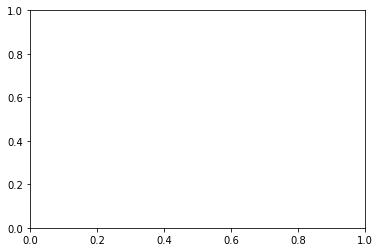

In [36]:
fig = plt.figure() # 建立畫布
ax = plt.axes()    # 建立軸物件

## 呼叫軸物件的作圖方法

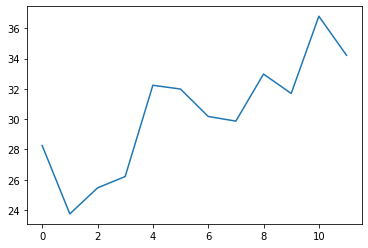

In [37]:
fig = plt.figure()
ax = plt.axes()
ax.plot(quarterly_operating_margins) # 呼叫軸物件的作圖方法

## 增添圖形元素、顯示圖形

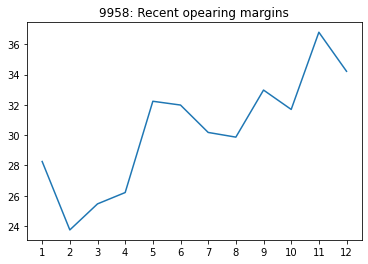

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.plot(quarterly_operating_margins)
ax.set_title("{}: Recent opearing margins".format(ticker)) # 增添圖形元素
ax.set_xticks(range(12))                                   # 增添圖形元素
ax.set_xticklabels(range(1, 13))                           # 增添圖形元素
plt.show()                                                 # 顯示圖形

## 在一個畫布繪畫兩個線圖

(2,)


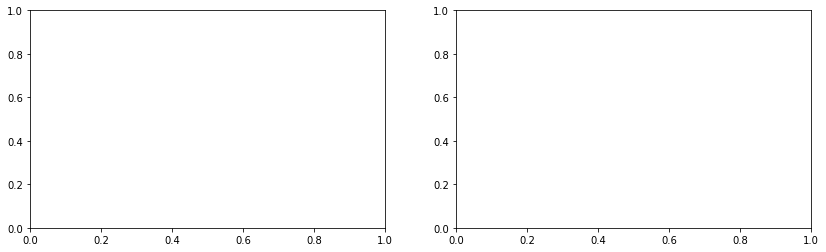

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
print(axes.shape)

## 先畫第一個線圖

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

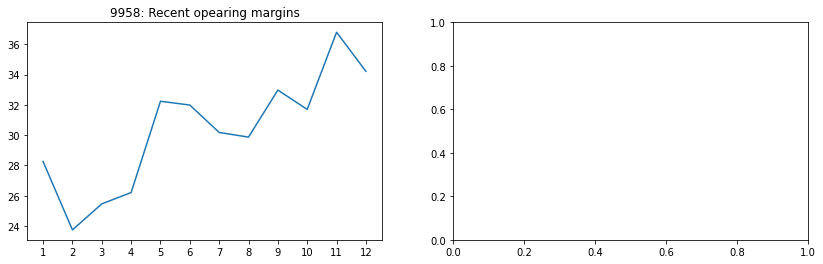

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(quarterly_operating_margins)
axes[0].set_title("{}: Recent opearing margins".format(ticker)) # 增添圖形元素
axes[0].set_xticks(range(12))                                   # 增添圖形元素
axes[0].set_xticklabels(range(1, 13))                           # 增添圖形元素

## 再畫第二個線圖

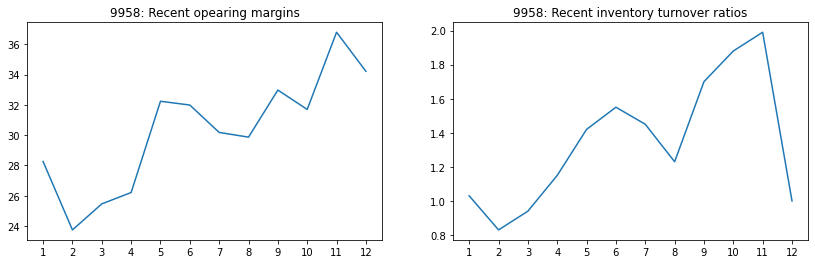

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(quarterly_operating_margins)
axes[0].set_title("{}: Recent opearing margins".format(ticker))          # 增添圖形元素
axes[0].set_xticks(range(12))                                            # 增添圖形元素
axes[0].set_xticklabels(range(1, 13))                                    # 增添圖形元素
axes[1].plot(quarterly_inventory_turnover_ratios)
axes[1].set_title("{}: Recent inventory turnover ratios".format(ticker)) # 增添圖形元素
axes[1].set_xticks(range(12))                                            # 增添圖形元素
axes[1].set_xticklabels(range(1, 13))                                    # 增添圖形元素
plt.show()

## 在圖形上撰寫中文字的方法

指定一個支援中文的字體路徑。

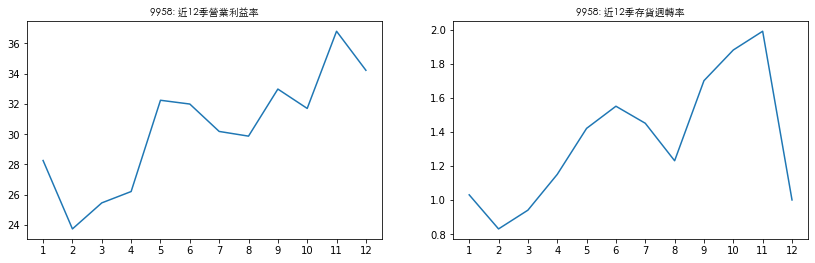

In [42]:
myfont = mpl.font_manager.FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc")
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(quarterly_operating_margins)
axes[0].set_title("{}: 近12季營業利益率".format(ticker), fontproperties=myfont)
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(range(1, 13))
axes[1].plot(quarterly_inventory_turnover_ratios)
axes[1].set_title("{}: 近12季存貨週轉率".format(ticker), fontproperties=myfont)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(range(1, 13))
plt.show()

## 調整主題樣式表

呼叫 `plt.style.available` 檢視有哪些可用的主題樣式表

In [43]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [44]:
def plot_2_ratios(ticker):
    quarterly_operating_margins = get_quarterly_operating_margins(ticker)
    quarterly_inventory_turnover_ratios = get_quarterly_inventory_turnover_ratios(ticker)
    myfont = mpl.font_manager.FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc")
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].plot(quarterly_operating_margins)
    axes[0].set_title("{}: 近12季營業利益率".format(ticker), fontproperties=myfont)
    axes[0].set_xticks(range(12))
    axes[0].set_xticklabels(range(1, 13))
    axes[1].plot(quarterly_inventory_turnover_ratios)
    axes[1].set_title("{}: 近12季存貨週轉率".format(ticker), fontproperties=myfont)
    axes[1].set_xticks(range(12))
    axes[1].set_xticklabels(range(1, 13))
    plt.show()

In [45]:
second_ticker = top_ranked['ticker'].values[1]
print(second_ticker)

6409


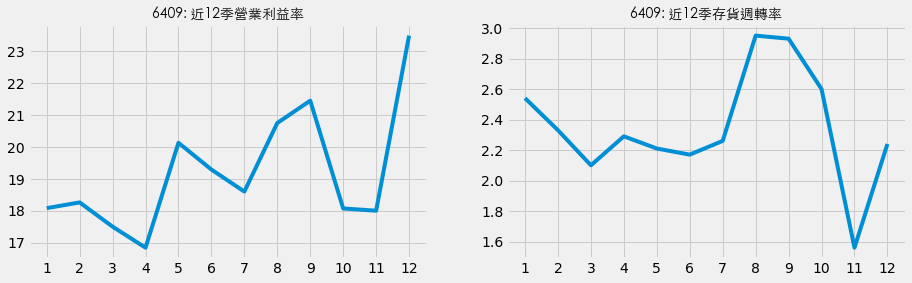

In [46]:
with plt.style.context('fivethirtyeight'):
    plot_2_ratios(second_ticker)